In [1]:
pip freeze

absl-py==2.2.0Note: you may need to restart the kernel to use updated packages.

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
alembic==1.14.1
altair==5.4.0
anaconda-client==1.11.2
anaconda-navigator==2.4.0
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
asgiref==3.8.1
astroid @ file:///C:/b/abs_d4lg3_taxn/croot/astroid_1676904351456/work
astropy @ file:///C:/ci/astropy_1657719642921/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
auto

In [3]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("best.pt")


In [4]:
# Perform inference on an image
results = model("image.jpg")

# Display results
results.show()



image 1/1 c:\Users\Siddhant Mehta\OneDrive\Documents\CVA_Assignment\image.jpg: 384x640 (no detections), 106.6ms
Speed: 9.0ms preprocess, 106.6ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)


AttributeError: 'list' object has no attribute 'show'

In [8]:
from ultralytics import YOLO

# Load your custom-trained YOLO model
model = YOLO("streamlitapp/Models/sam_b.pt")

# Perform inference on an image
results = model("C:/Users/Siddhant Mehta/OneDrive/Documents/CVA_Assignment/Covers_Doku-article-1512-1.png")

# Access and visualize results
for result in results:  # Iterate over the list of results
    result.plot()  # Use 'plot()' to visualize results with bounding boxes

    # Optional: Print detection details
    print("Bounding Boxes (x1, y1, x2, y2):", result.boxes.xyxy)  # Bounding boxes
    print("Confidence Scores:", result.boxes.conf)  # Confidence scores
    print("Class Indices:", result.boxes.cls)  # Class indices


KeyError: 'model'

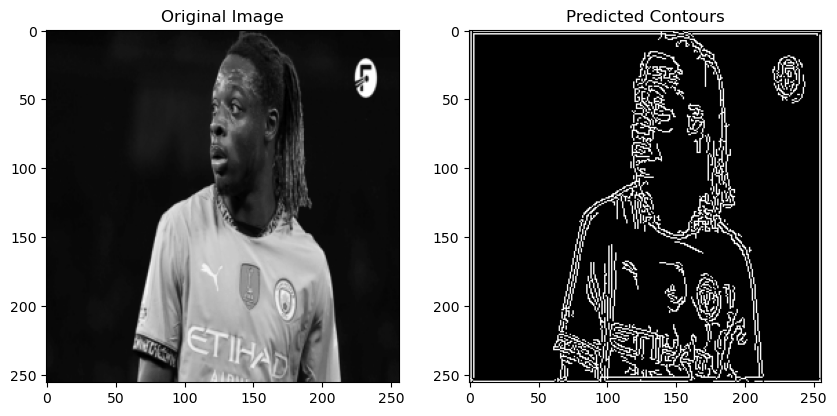

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

def conv_block(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
        nn.ReLU(inplace=True)
    )

def up_conv(in_channels, out_channels):
    return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)

def create_unet(in_channels=1, out_channels=1):
    model = {}
    model["enc1"] = conv_block(in_channels, 64)
    model["enc2"] = conv_block(64, 128)
    model["enc3"] = conv_block(128, 256)
    model["enc4"] = conv_block(256, 512)
    model["bottleneck"] = conv_block(512, 1024)
    model["dec4_up"] = up_conv(1024, 512)
    model["dec4"] = conv_block(1024, 512)
    model["dec3_up"] = up_conv(512, 256)
    model["dec3"] = conv_block(512, 256)
    model["dec2_up"] = up_conv(256, 128)
    model["dec2"] = conv_block(256, 128)
    model["dec1_up"] = up_conv(128, 64)
    model["dec1"] = conv_block(128, 64)
    model["final"] = nn.Conv2d(64, out_channels, kernel_size=1)
    return model

def forward_unet(model, x):
    e1 = model["enc1"](x)
    e2 = model["enc2"](F.max_pool2d(e1, 2))
    e3 = model["enc3"](F.max_pool2d(e2, 2))
    e4 = model["enc4"](F.max_pool2d(e3, 2))
    b = model["bottleneck"](F.max_pool2d(e4, 2))
    d4 = model["dec4_up"](b)
    d4 = model["dec4"](torch.cat([d4, e4], dim=1))
    d3 = model["dec3_up"](d4)
    d3 = model["dec3"](torch.cat([d3, e3], dim=1))
    d2 = model["dec2_up"](d3)
    d2 = model["dec2"](torch.cat([d2, e2], dim=1))
    d1 = model["dec1_up"](d2)
    d1 = model["dec1"](torch.cat([d1, e1], dim=1))
    return torch.sigmoid(model["final"](d1))

def preprocess_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path).convert("L")
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor()
    ])
    return transform(image).unsqueeze(0)

if __name__ == "__main__":
    model = create_unet(in_channels=1, out_channels=1)
    image_path = "C:/Users/Siddhant Mehta/OneDrive/Documents/CVA_Assignment/Covers_Doku-article-1512-1.png"
    input_image = preprocess_image(image_path)
    with torch.no_grad():
        output = forward_unet(model, input_image)
    output_np = output.squeeze().cpu().numpy()
    output_np = (output_np - output_np.min()) / (output_np.max() - output_np.min())
    binary_mask = (output_np * 255).astype(np.uint8)
    edges = cv2.Canny(binary_mask, 50, 150)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(input_image.squeeze(), cmap="gray")
    ax[0].set_title("Original Image")
    ax[1].imshow(edges, cmap="gray")
    ax[1].set_title("Predicted Contours")
    plt.show()

In [11]:
from ultralytics import YOLO

# Load the YOLOv8 segmentation model
model = YOLO("yolov8n-seg.pt")  # 'n' stands for nano, other options: 's', 'm', 'l', 'x'
results = model("image.jpg")  # Perform segmentation
results[0].show()  # Show the output image



image 1/1 c:\Users\Siddhant Mehta\OneDrive\Documents\CVA_Assignment\image.jpg: 384x640 2 persons, 1 frisbee, 101.1ms
Speed: 3.5ms preprocess, 101.1ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


In [15]:
pip uninstall onnxruntime onnxruntime-gpu -y




SyntaxError: invalid syntax (371390548.py, line 1)

In [1]:
import os
import pickle
import tensorflow as tf
from tensorflow.keras.models import save_model

# Folder containing the pickle models
pickle_folder = "streamlitapp/Models/"  # Change to your actual directory

# Create an output folder for .h5 models
h5_folder = "h5_models/"
os.makedirs(h5_folder, exist_ok=True)

# Loop through all pickle files in the folder
for filename in os.listdir(pickle_folder):
    if filename.endswith(".pkl"):  # Process only pickle files
        pickle_path = os.path.join(pickle_folder, filename)
        
        # Load the pickle model
        with open(pickle_path, "rb") as file:
            try:
                model = pickle.load(file)
                
                # Ensure the model is a TensorFlow/Keras model
                if isinstance(model, tf.keras.Model):
                    # Save as .h5
                    h5_filename = filename.replace(".pkl", ".h5")
                    h5_path = os.path.join(h5_folder, h5_filename)
                    model.save(h5_path)
                    
                    print(f"✅ Converted {filename} → {h5_filename}")
                else:
                    print(f"⚠️ Skipping {filename}: Not a Keras model")

            except Exception as e:
                print(f"❌ Error loading {filename}: {e}")

print("🎉 Conversion complete!")


c:\Users\Siddhant Mehta\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


❌ Error loading EfficientNet_model.pkl: cannot pickle 'module' object


✅ Converted Inception_model.pkl → Inception_model.h5
❌ Error loading mobilenet_model.pkl: No module named 'keras.src.saving.pickle_utils'
❌ Error loading nas_model.pkl: No module named 'keras.src.saving.pickle_utils'
❌ Error loading own1_model.pkl: No module named 'keras.src.saving.pickle_utils'
❌ Error loading own2_model.pkl: No module named 'keras.src.saving.pickle_utils'
❌ Error loading resnet_model.pkl: No module named 'keras.src.saving.pickle_utils'
❌ Error loading vgg_model.pkl: No module named 'keras.src.saving.pickle_utils'
❌ Error loading xception_model.pkl: No module named 'keras.src.saving.pickle_utils'
🎉 Conversion complete!


In [2]:
import pickle
import tensorflow as tf
import keras

# Monkey-patch keras.src.saving.pickle_utils if missing
import sys
import keras.saving.pickle_utils

sys.modules["keras.src.saving.pickle_utils"] = keras.saving.pickle_utils

# Now, try loading your model
with open("streamlitapp/Models/mobilenet_model.pkl", "rb") as file:
    model = pickle.load(file)
    
model.save("mobilenet_model.h5")  # Save to H5 format


ModuleNotFoundError: No module named 'keras.saving.pickle_utils'

In [ ]:
pip install tensorflow==2.17.0 numpy==1.26.4 keras==3.5.0


  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.0 MB 3.3 MB/s eta 0:01:58
   ---------------------------------------- 0.7/385.0 MB 7.5 MB/s eta 0:00:52
   ---------------------------------------- 0.9/385.0 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 1.4/385.0 MB 7.4 MB/s eta 0:00:52
   ---------------------------------------- 1.7/385.0 MB 7.9 MB/s eta 0:00:49
   ---------------------------------------- 1.9/385.0 MB 7.4 MB/s eta 0:00:52
   ----------------------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
sagemaker 2.233.0 requires attrs<24,>=23.1.0, but you have attrs 24.3.0 which is incompatible.


In [5]:
pip install keras==3.5.0


  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.9.0
    Uninstalling keras-3.9.0:
      Successfully uninstalled keras-3.9.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow.keras.applications import vgg19